In [25]:
%matplotlib notebook

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

In [27]:
file1=('ride_data.csv')
file2=('city_data.csv')

df_ride=pd.read_csv(file1)
df_city=pd.read_csv(file2)

df=pd.merge(df_ride, df_city, on='city',how='outer')

<IPython.core.display.Javascript object>


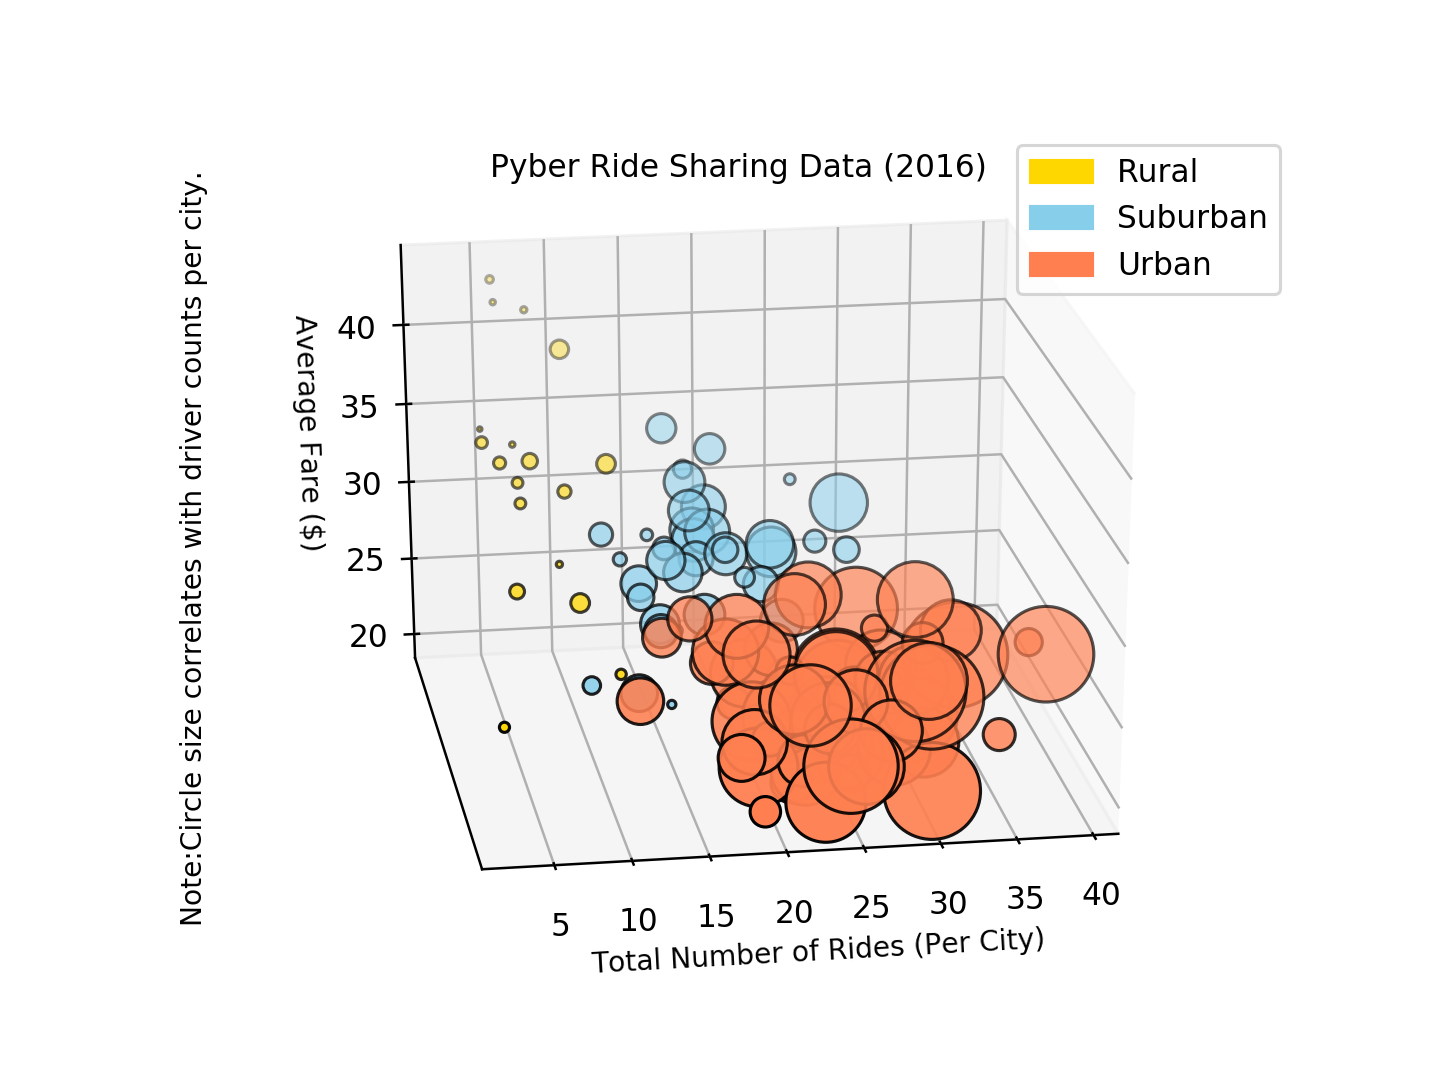

In [28]:
df_city_type=df.groupby(['type','city'])
df_city_fare=df_city_type['fare'].mean()
df_city_ride=df_city_type['ride_id'].count()
df_city_driver=df_city_type['driver_count'].sum()

colors=[]
for types in df_city_type['type']:
    if 'Urban' in str(types):
        c='coral'
        colors.append(c)
    if 'Suburban' in str(types):
        c='skyblue'
        colors.append(c)
    if 'Rural' in str(types):
        c='gold'
        colors.append(c)
fig=plt.figure(0)
ax=fig.add_subplot(111,projection='3d')

X=df_city_ride
Y=df_city_fare
Z=df_city_fare

ax.scatter(X, Y, Z,  s=(df_city_driver)/2, c=colors,marker='o', 
           edgecolors="black")

ax.set_xlabel('Total Number of Rides (Per City)', size=9)
ax.set_zlabel('Average Fare ($)',size=9)
ax.set_yticks([])
ax.set_title('Pyber Ride Sharing Data (2016)',size=10)

gold_patch = mpatches.Patch(color='gold', label='Rural')
blue_patch = mpatches.Patch(color='skyblue', label='Suburban')
coral_patch = mpatches.Patch(color='coral', label='Urban')
plt.legend(handles=[gold_patch, blue_patch, coral_patch])

plt.annotate('Note:Circle size correlates with driver counts per city.', xy=(0.00,.05),
             rotation=90, xycoords='axes fraction',size=9)

plt.savefig("Pyber_ride_sharing.png")
plt.show()

<IPython.core.display.Javascript object>


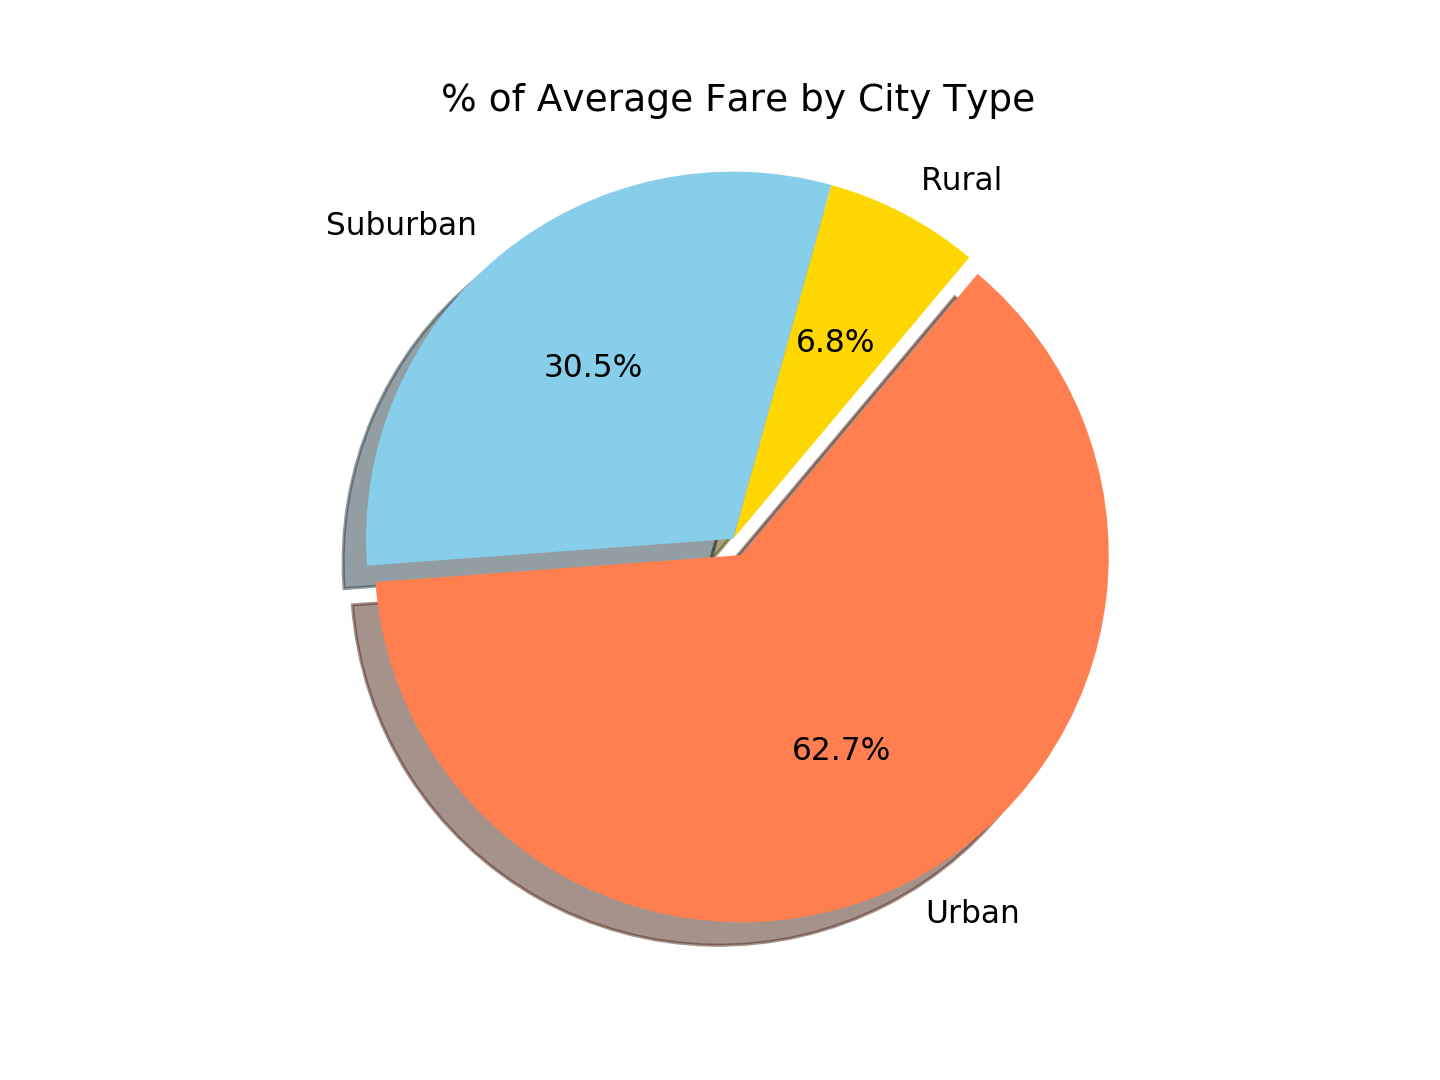

In [29]:
df_types_group=df.groupby(df['type'])
df_types_fare=df_types_group['fare'].sum()
df_types_ride=df_types_group['ride_id'].count()
df_types_driver=df_types_group['driver_count'].sum()

plt.figure(1)
labels = ['Rural','Suburban','Urban']
colors = ['Gold', 'SkyBlue', 'Coral']
plt.pie(df_types_fare,explode=(0,0,0.05), colors=colors, labels=labels,shadow=True,
        autopct="%1.1f%%", startangle=50)
plt.title('% of Average Fare by City Type')
plt.axis("equal")

plt.savefig("Pyber_pct_fare.png")
plt.show()

<IPython.core.display.Javascript object>


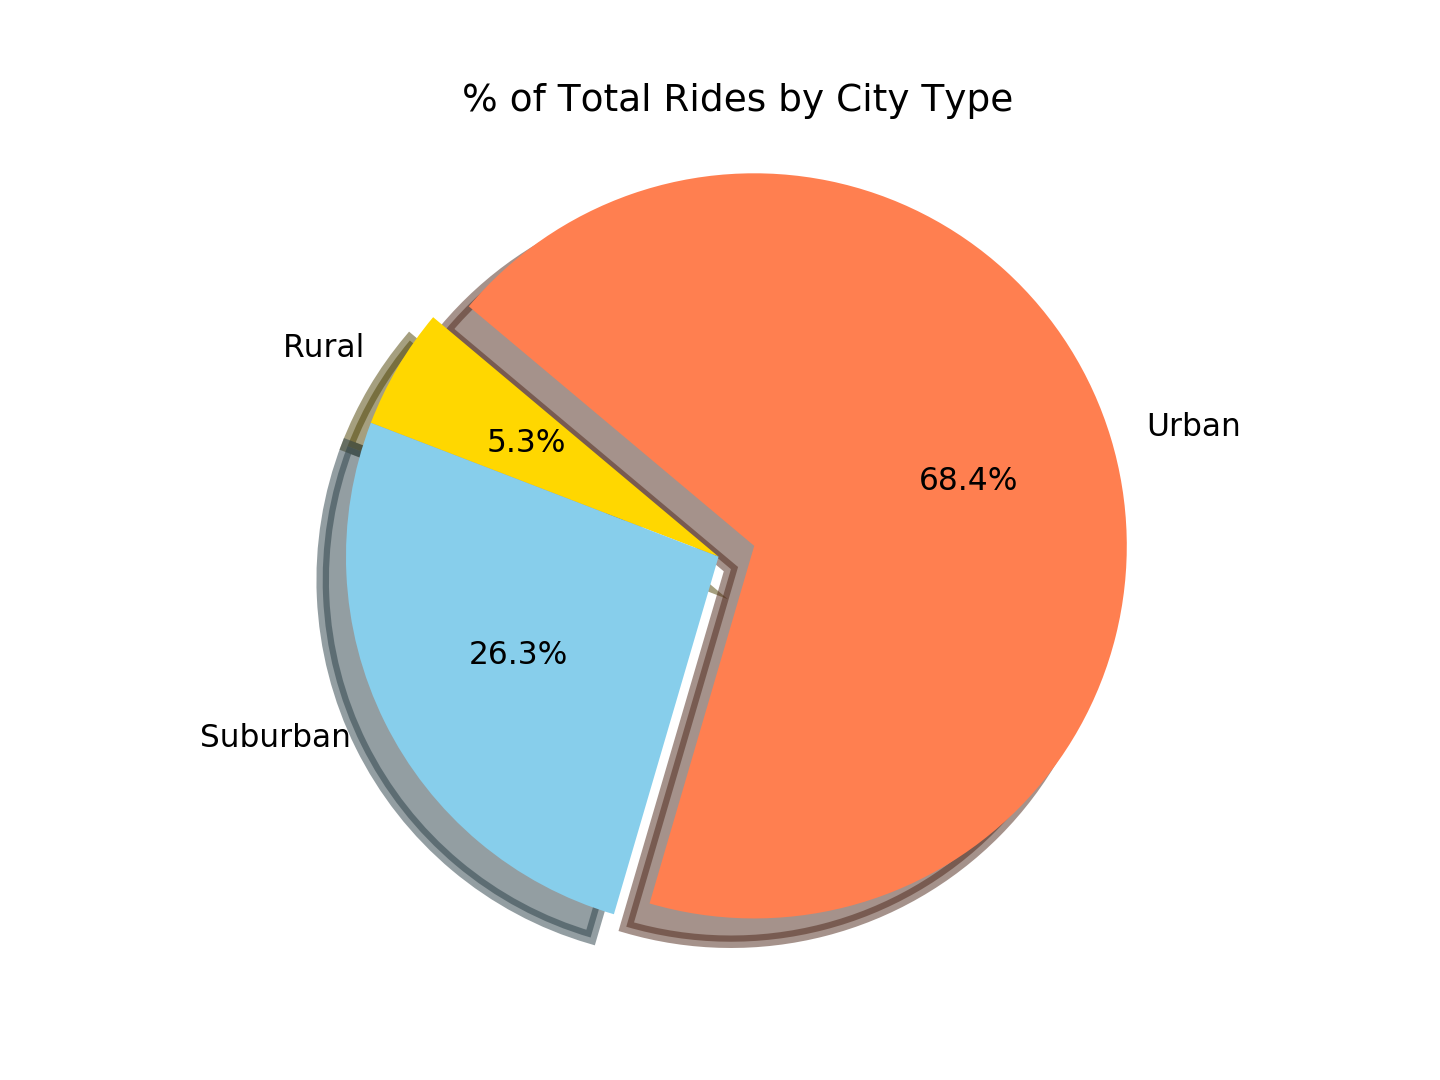

In [30]:
plt.figure(2)
plt.pie(df_types_ride, explode=(0,0,0.1), colors=colors, labels=labels, shadow=True, wedgeprops = {'linewidth':4},
        autopct="%1.1f%%", startangle=500)
plt.title('% of Total Rides by City Type')
plt.axis("equal")

plt.savefig("Pyber_total_ride.png")
plt.show()

<IPython.core.display.Javascript object>


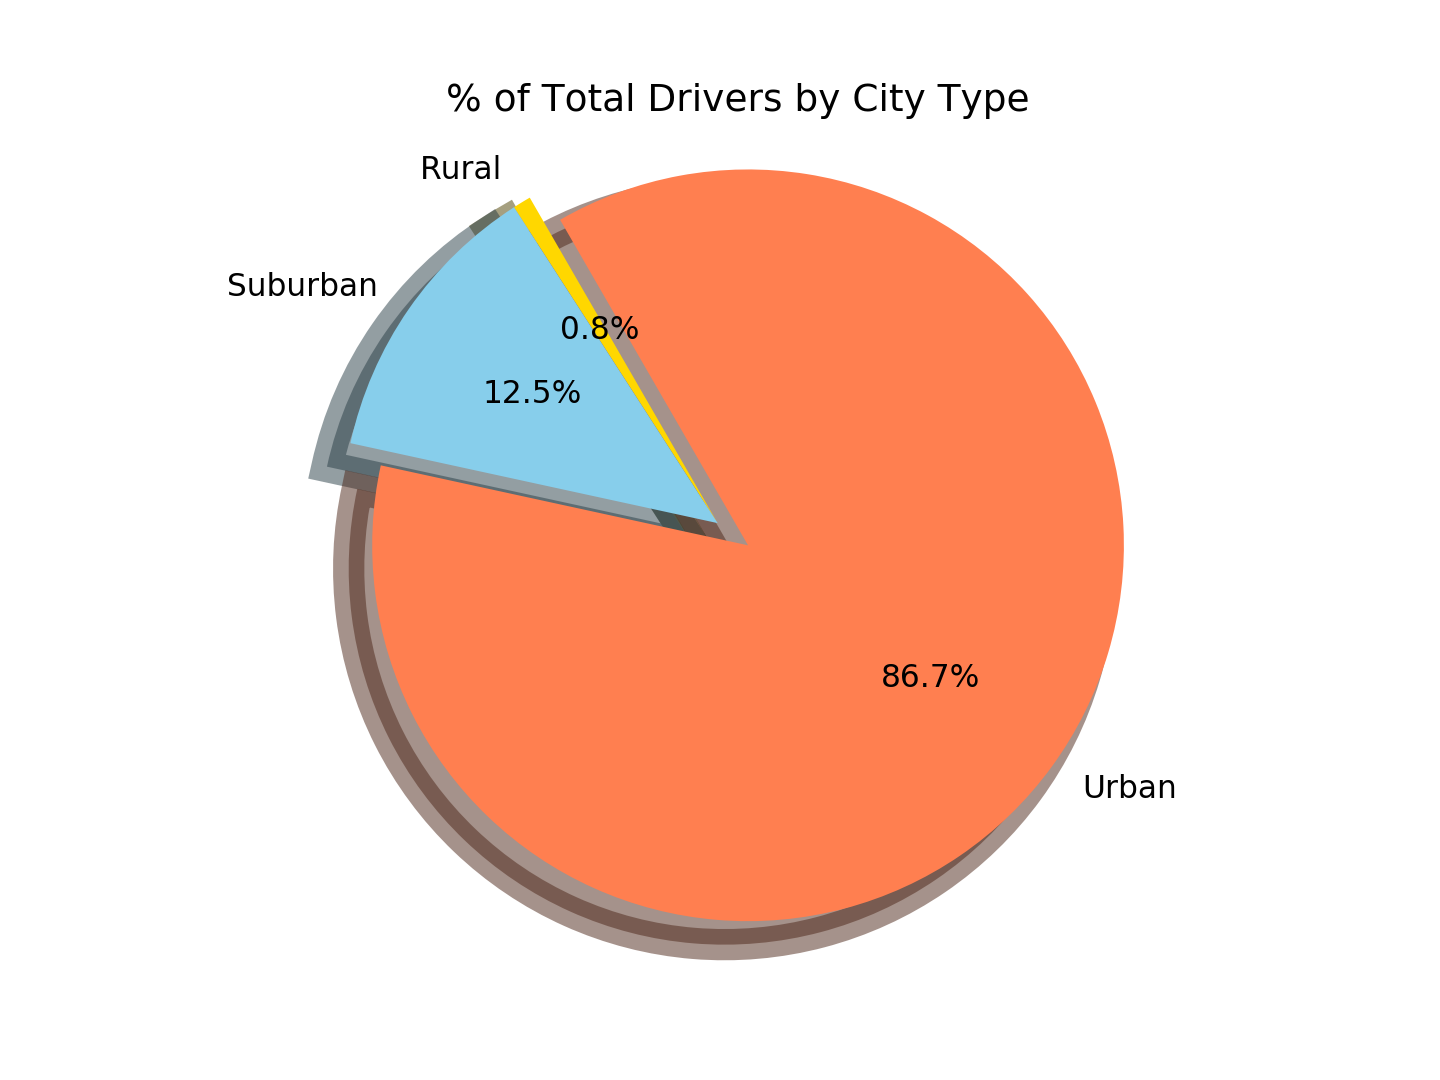

In [31]:
plt.figure(3)
plt.pie(df_types_driver, explode=(0,0,0.1), colors=colors, labels=labels, shadow=True, wedgeprops = {'linewidth': 10},
        autopct="%1.1f%%", startangle=3000)
plt.title('% of Total Drivers by City Type')
plt.axis("equal")

plt.savefig("Pyber_total_driver.png")
plt.show()